In [1]:
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import networkx as nx

import simplicial
import simplicial.drawing

from simplicialx.simplicial import SimplicialComplex

Simplicial fixed for Python 3


## Simplicial complexes

An (abstract) simplicial complex $K$ on a finite set $V$ (called a vertex set) is the family of subsets $\sigma = \{v_0, \dots, v_k\}$ of $V$ closed under inclusion. That is, for every $\sigma \in K$ any of its subset $\tau \subseteq \sigma$ is also in $K$.

In [2]:
# create simplicial complex
cmplx = simplicial.SimplicialComplex()

In [3]:
# add 0-simplices (vertices)
v1 = cmplx.addSimplex(id="v1")
v2 = cmplx.addSimplex(id="v2")
v3 = cmplx.addSimplex(id="v3")
v4 = cmplx.addSimplex(id="v4")
v5 = cmplx.addSimplex(id="v5")
v6 = cmplx.addSimplex(id="v6")
v7 = cmplx.addSimplex(id="v7")

In [4]:
# add 1-simplices (edges)
cmplx.addSimplex(['v2', 'v3'], id="e1")
cmplx.addSimplex(['v4', 'v5'], id="e2")
cmplx.addSimplex(['v4', 'v6'], id="e3")
cmplx.addSimplex(['v5', 'v6'], id="e4")
cmplx.addSimplex(['v5', 'v7'], id="e5")
cmplx.addSimplex(['v6', 'v7'], id="e6")

'e6'

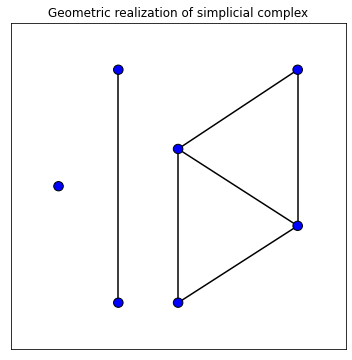

In [5]:
# set coordinates for vertices
em = simplicial.Embedding(cmplx)
em.positionSimplex(v1, (0.0, 0.5))

em.positionSimplex(v2, (0.25, 1.0))
em.positionSimplex(v3, (0.25, 0.0))

em.positionSimplex(v4, (1.0, 1.0))
em.positionSimplex(v5, (0.5, 0.66))
em.positionSimplex(v6, (1.0, 0.33))
em.positionSimplex(v7, (0.5, 0.0))

# draw simplicial complex
fig = plt.figure(figsize=(6,6))
plt.title("Geometric realization of simplicial complex")
simplicial.drawing.draw_complex(cmplx, em)

### Betti numbers

_K-th Betti number_ of topological space is the rank of its' associated _k-th homological group_ and describes the number of holes of dimension $k+1$.

- 1-dimensional holes (b_0) are connected components
- 2-dimensional holes (b_1) are loops
- 3-dimensional holes (b_2) are voids

**Exercise**

Evaluate the dimensionality and non-vanishing Betti numbers of a simplicial complex

In [6]:
# evaluate complex dimension
dim = cmplx.maxOrder()

# evaluate Betti numbers
betti = cmplx.bettiNumbers()

In [7]:
print("Dimension of complex: {}".format(dim))
for key in betti:
    if key <= dim:
        print("Betti-{}: {}".format(str(key), betti[key]))

Dimension of complex: 1
Betti-0: 3
Betti-1: 2


### Modifying the topology of the simplicial complex

**Exercise**

Modify the topology of the simplicial complex by "filling" one of its' 2-dimensional holes by a 2-simplex which is a triangle.

In [8]:
# add 2-simplex (triangle)
cmplx.addSimplex(['e2', 'e3', 'e4'], id="t1")

't1'

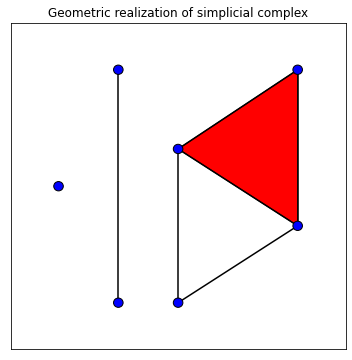

In [9]:
# draw simplicial complex
fig = plt.figure(figsize=(6,6))
plt.title("Geometric realization of simplicial complex")
simplicial.drawing.draw_complex(cmplx, em)

In [10]:
# evaluate complex dimension
dim = cmplx.maxOrder()

# evaluate Betti numbers
betti = cmplx.bettiNumbers()

In [11]:
print("Dimension of complex: {}".format(dim))
for key in betti:
    if key <= dim:
        print("Betti-{}: {}".format(str(key), betti[key]))

Dimension of complex: 2
Betti-0: 3
Betti-1: 1
Betti-2: 0


### SimplicialX

#### Create complex to a complex

In [13]:
K_butterfly = SimplicialComplex()
K_butterfly.simplices

[]

#### Add simplices

In [14]:
K_butterfly.add(np.array([1, 2, 3]))
K_butterfly.simplices

[array([[1],
        [2],
        [3]]),
 array([[1, 2],
        [1, 3],
        [2, 3]]),
 array([[1, 2, 3]])]

It is also acceptable to submit simplex as a python list or tuple:

In [15]:
K_butterfly.add((3, 4))
K_butterfly.add([3, 5])
K_butterfly.add([4, 5])
K_butterfly.simplices

[array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([[1, 2],
        [1, 3],
        [2, 3],
        [3, 4],
        [3, 5],
        [4, 5]]),
 array([[1, 2, 3]])]

#### Degree

Two $k$-simplices $\sigma_i$ and $\sigma_j$ are lower adjacent, denoted by $\sigma_i \smile \sigma_j$, if they share a common facet. Two $k$-simplices $\sigma_i$ and $\sigma_j$ are upper adjacent, denoted by $\sigma_i \frown \sigma_j$, if they share a common cofacet.

A lower degree of a $k$-simplex is the number of facets, i.e. $(k-1)$-simplicies, it is lower adjacent to

\begin{equation}
\mathrm{deg}_{\smile}(\sigma) = \#\{ \tau \in K \mid \sigma \smile \tau,~\tau \subseteq \sigma,~\mathrm{dim}(\tau) = \mathrm{dim}(\sigma) - 1 \}.
\end{equation}

An upper degree of a $k$-simplex is the number of cofacets, i.e. $(k+1)$-simplicies, it is upper adjacent to

\begin{equation}
    \mathrm{deg}_{\frown}(\sigma) = \#\{ \rho \in K \mid \sigma \frown \rho,~\sigma \subseteq \rho,~\mathrm{dim}(\rho) = \mathrm{dim}(\sigma) + 1 \}.
\end{equation}

In [17]:
K_butterfly.incidence(k=1, p=1) # node-edge incidence

array([2., 2., 4., 2., 2.])

In [18]:
K_butterfly.incidence(k=2, p=2) # node-triangle incidence

array([1., 1., 1., 0., 0.])

In [19]:
K_butterfly.incidence(k=2, p=1) # edge-triangle incidence

array([1., 1., 1., 0., 0., 0.])

#### Adjacency

In [20]:
K_butterfly.degree(k=1, p=1) # node-edge degree

array([2., 2., 4., 2., 2.])

#### Removing simplex from a complex

In [22]:
K_butterfly.remove([1, 2])
K_butterfly.simplices

[array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([[1, 3],
        [2, 3],
        [3, 4],
        [3, 5],
        [4, 5]])]

### Simplicial complex of a graph

In [23]:
G = nx.karate_club_graph()

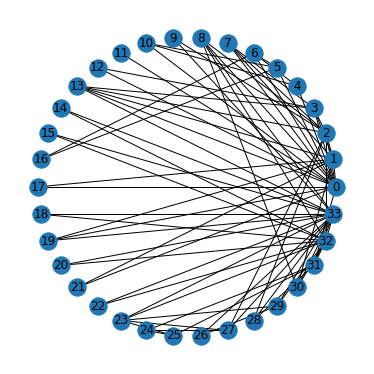

In [24]:
plt.figure(figsize=(5,5))
nx.draw_circular(G, with_labels=True)
plt.show()

In [28]:
K = SimplicialComplex.from_graph(G, kind="clique", n_skeleton=4)
K_skeleton1 = SimplicialComplex.from_graph(G, kind="clique", n_skeleton=2)

In [29]:
K.simplices

[array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33]]),
 array([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],


In [30]:
K_skeleton1.simplices

[array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33]]),
 array([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],


#### Dimension

In [31]:
K.dim

4

#### F-vector

In [32]:
K.f_vector

array([34, 78, 45, 11,  2])

In [33]:
len(K)

170

#### Euler characteristic

In [35]:
K.euler_characteristic

-8

#### Betti numbers

In [34]:
K.betti()

array([1., 9., 0., 0., 0.])

#### Degree

In [36]:
K.simplex_degree(k=1, p=1) # node-edge

array([16.,  9., 10.,  6.,  3.,  4.,  4.,  4.,  5.,  2.,  3.,  1.,  2.,
        5.,  2.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  5.,  3.,  3.,
        2.,  4.,  3.,  4.,  4.,  6., 12., 17.])

In [37]:
K.simplex_degree(k=2, p=2) # node-triangle

array([18., 12., 11., 10.,  2.,  3.,  3.,  6.,  5.,  0.,  2.,  0.,  1.,
        6.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,
        1.,  1.,  1.,  4.,  3.,  3., 13., 15.])

In [38]:
K.simplex_degree(k=2, p=1) # edge-triangle

array([ 7.,  5.,  5.,  2.,  2.,  2.,  3.,  1.,  2.,  0.,  1.,  3.,  1.,
        1.,  1.,  0.,  4.,  4.,  3.,  3.,  1.,  1.,  1.,  0.,  4.,  3.,
        2.,  0.,  3.,  0.,  0.,  1.,  3.,  1.,  3.,  1.,  1.,  2.,  1.,
        1.,  1.,  2.,  3.,  2.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  0.,  1.,  2.,  2.,  3.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  2.,  3.,  2.,  2.,  1.,  2., 10.])

#### Adjacency

In [39]:
K.simplex_adjacency_n(k=1, p=1) # node-edge adjacency

array([16.,  9., 10.,  6.,  3.,  4.,  4.,  4.,  5.,  2.,  3.,  1.,  2.,
        5.,  2.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  5.,  3.,  3.,
        2.,  4.,  3.,  4.,  4.,  6., 12., 17.])

In [40]:
K.simplex_adjacency_n(k=2, p=2) # node-triangle adjacency

array([14.,  8.,  7.,  6.,  3.,  4.,  4.,  4.,  5.,  0.,  3.,  0.,  2.,
        4.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  2.,  2.,
        2.,  2.,  2.,  4.,  3.,  5., 12., 14.])

In [41]:
K.simplex_adjacency_n(k=2, p=1) # edge-triangle adjacency

array([14., 10., 10.,  4.,  4.,  4.,  6.,  2.,  4.,  0.,  2.,  6.,  2.,
        2.,  2.,  0.,  8.,  8.,  6.,  6.,  2.,  2.,  2.,  0.,  8.,  6.,
        4.,  0.,  6.,  0.,  0.,  2.,  6.,  2.,  6.,  2.,  2.,  4.,  2.,
        2.,  2.,  4.,  6.,  4.,  0.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,
        0.,  2.,  2.,  2.,  2.,  0.,  2.,  4.,  4.,  6.,  2.,  0.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  4.,  6.,  4.,  4.,  2.,  4., 20.])

#### Closeness centrality

In [42]:
K.simplex_closeness_centrality(p=0, q=1) # node-edge closeness

{(0,): 0.5689655172413793,
 (1,): 0.4852941176470588,
 (2,): 0.559322033898305,
 (3,): 0.4647887323943662,
 (4,): 0.3793103448275862,
 (5,): 0.38372093023255816,
 (6,): 0.38372093023255816,
 (7,): 0.44,
 (8,): 0.515625,
 (10,): 0.3793103448275862,
 (11,): 0.36666666666666664,
 (12,): 0.3707865168539326,
 (13,): 0.515625,
 (17,): 0.375,
 (19,): 0.5,
 (21,): 0.375,
 (31,): 0.5409836065573771,
 (30,): 0.4583333333333333,
 (9,): 0.4342105263157895,
 (27,): 0.4583333333333333,
 (28,): 0.4520547945205479,
 (32,): 0.515625,
 (16,): 0.28448275862068967,
 (33,): 0.55,
 (14,): 0.3707865168539326,
 (15,): 0.3707865168539326,
 (18,): 0.3707865168539326,
 (20,): 0.3707865168539326,
 (22,): 0.3707865168539326,
 (23,): 0.39285714285714285,
 (25,): 0.375,
 (29,): 0.38372093023255816,
 (24,): 0.375,
 (26,): 0.3626373626373626}

In [43]:
K.simplex_closeness_centrality(p=0, q=2) # node-triangle closeness

{(0,): 0.49206349206349204,
 (1,): 0.40789473684210525,
 (2,): 0.5,
 (3,): 0.3974358974358974,
 (4,): 0.34444444444444444,
 (5,): 0.34831460674157305,
 (6,): 0.34831460674157305,
 (7,): 0.3875,
 (8,): 0.5166666666666667,
 (10,): 0.34444444444444444,
 (12,): 0.33695652173913043,
 (13,): 0.3875,
 (17,): 0.33695652173913043,
 (19,): 0.33695652173913043,
 (21,): 0.33695652173913043,
 (32,): 0.5081967213114754,
 (16,): 0.26495726495726496,
 (30,): 0.3875,
 (33,): 0.4696969696969697,
 (14,): 0.36046511627906974,
 (15,): 0.36046511627906974,
 (18,): 0.36046511627906974,
 (20,): 0.36046511627906974,
 (22,): 0.36046511627906974,
 (23,): 0.32978723404255317,
 (27,): 0.3263157894736842,
 (29,): 0.36904761904761907,
 (24,): 0.2719298245614035,
 (25,): 0.2719298245614035,
 (31,): 0.36470588235294116,
 (26,): 0.3263157894736842,
 (28,): 0.34444444444444444}

#### Betweeneess centrality

In [44]:
K.simplex_betweenness_centrality(p=0, q=1) # node-edge betweenness

{(0,): 0.4376352813852815,
 (1,): 0.05393668831168831,
 (2,): 0.14365680615680615,
 (3,): 0.011909271284271283,
 (4,): 0.0006313131313131313,
 (5,): 0.02998737373737374,
 (6,): 0.029987373737373736,
 (7,): 0.0,
 (8,): 0.05592682780182782,
 (10,): 0.0006313131313131313,
 (11,): 0.0,
 (12,): 0.0,
 (13,): 0.045863395863395856,
 (17,): 0.0,
 (19,): 0.03247504810004811,
 (21,): 0.0,
 (31,): 0.13827561327561327,
 (30,): 0.014411976911976905,
 (9,): 0.0008477633477633478,
 (27,): 0.022333453583453587,
 (28,): 0.0017947330447330447,
 (32,): 0.14524711399711404,
 (16,): 0.0,
 (33,): 0.30407497594997596,
 (14,): 0.0,
 (15,): 0.0,
 (18,): 0.0,
 (20,): 0.0,
 (22,): 0.0,
 (23,): 0.017613636363636363,
 (25,): 0.0038404882154882162,
 (29,): 0.0029220779220779218,
 (24,): 0.0022095959595959595,
 (26,): 0.0}

In [47]:
K.simplex_betweenness_centrality(p=1, q=2) # edge-node betweenness

{(0, 1): 0.15135975135975138,
 (0, 2): 0.3184926184926185,
 (0, 3): 0.06324786324786326,
 (0, 7): 0.010023310023310023,
 (0, 13): 0.010023310023310023,
 (0, 17): 0.0,
 (0, 19): 0.0,
 (0, 21): 0.0,
 (1, 2): 0.015695415695415698,
 (1, 3): 0.0052059052059052055,
 (1, 7): 0.002097902097902098,
 (1, 13): 0.002097902097902098,
 (1, 17): 0.0,
 (1, 19): 0.0,
 (1, 21): 0.0,
 (0, 8): 0.0,
 (2, 3): 0.014296814296814297,
 (2, 7): 0.008158508158508158,
 (2, 8): 0.32167832167832167,
 (2, 13): 0.008158508158508158,
 (0, 12): 0.0,
 (3, 7): 0.0011655011655011655,
 (3, 12): 0.0,
 (3, 13): 0.0011655011655011655,
 (0, 4): 0.002564102564102564,
 (0, 6): 0.0044289044289044285,
 (0, 10): 0.002564102564102564,
 (4, 6): 0.0,
 (4, 10): 0.0,
 (0, 5): 0.0044289044289044285,
 (5, 6): 0.006526806526806527,
 (5, 10): 0.0,
 (2, 32): 0.0,
 (8, 32): 0.32925407925407923,
 (5, 16): 0.0,
 (6, 16): 0.0,
 (8, 30): 0.0031468531468531466,
 (8, 33): 0.005827505827505828,
 (30, 32): 0.005827505827505828,
 (30, 33): 0.0029137529

### Simplicial complex of a relation

Left Dowker complex for a relation $R$ on a sets $X,Y$ is called the simplicial complex $L$, with the vertex set given by $X$, having simplices $\sigma = \{x_0, x_1, \dots, x_n \} \in R(x_i, x)$ for some $x$. Right Dowker complex for a relation $R$, , with the vertex set given by X, is the simplicial complex $K$, $σ = \{y_0, y_1, . . . , y_n \} \in R(x, y_i)$.

In [68]:
R = np.array([
    [0, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1]
])

actors_rows = [
    "Bale, Christian",
    "Carrey, Jim",
    "Day-Levis, Daniel",
    "Di Caprio, Leonardo",
    "Diaz, Cameron",
    "Freeman, Morgan",
    "Gordon-Levitt, Joseph",
    "Hardy, Tom",
    "Murphy, Cillian",
    "Pitt, Brad",
    "Styles, Harry",
    "Winslet, Kate"
]

films_columns = [
    "Bruce Almighty",
    "Dark Knight",
    "Dark Knight Rises",
    "Dunkirk",
    "Inception",
    "Gangs of New York",
    "Lincoln",
    "Once in Hollywood",
    "Titanic"
]

#### Excercise

Create row and column Dowker complexes. Compute its' characteristics presented before. What is the most between-central vertex by edges and by triangles?

In [90]:
D_row = SimplicialComplex()

for i, row in enumerate(R):
    sigma = np.nonzero(row)[0]
    D_row.add(sigma)

In [112]:
D_row.simplices

[array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]]),
 array([[0, 1],
        [0, 2],
        [1, 2],
        [1, 3],
        [1, 4],
        [2, 3],
        [2, 4],
        [2, 6],
        [3, 4],
        [4, 5],
        [4, 6],
        [5, 6]]),
 array([[0, 1, 2],
        [1, 2, 3],
        [1, 2, 4],
        [1, 3, 4],
        [2, 3, 4],
        [2, 4, 6]]),
 array([[1, 2, 3, 4]])]

In [113]:
D_row.remove([2,4,6])

In [114]:
D_row.simplices

[array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]]),
 array([[0, 1],
        [0, 2],
        [1, 2],
        [1, 3],
        [1, 4],
        [2, 3],
        [2, 4],
        [2, 6],
        [3, 4],
        [4, 5],
        [4, 6],
        [5, 6]]),
 array([[0, 1, 2],
        [1, 2, 3],
        [1, 2, 4],
        [1, 3, 4],
        [2, 3, 4]]),
 array([[1, 2, 3, 4]])]

In [94]:
len(D_row)

28

In [102]:
D_row.betti()

array([3., 1., 0., 0.])

In [ ]:
D_col.euler_characteristic

In [92]:
D_col = SimplicialComplex()

for j, column in enumerate(R.T):
    sigma = np.nonzero(column)[0]
    D_col.add(sigma)

In [93]:
D_col.simplices

[array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11]]),
 array([[ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 1,  5],
        [ 2,  3],
        [ 2,  4],
        [ 2,  6],
        [ 3,  4],
        [ 3,  6],
        [ 3,  7],
        [ 3,  8],
        [ 5,  6],
        [ 5,  7],
        [ 5,  8],
        [ 6,  7],
        [ 6,  8],
        [ 7,  8],
        [ 7, 10],
        [ 8, 10]]),
 array([[ 0,  5,  6],
        [ 0,  5,  7],
        [ 0,  5,  8],
        [ 0,  6,  7],
        [ 0,  6,  8],
        [ 0,  7,  8],
        [ 2,  3,  4],
        [ 3,  6,  7],
        [ 3,  6,  8],
        [ 3,  7,  8],
        [ 5,  6,  7],
        [ 5,  6,  8],
        [ 5,  7,  8],
        [ 6,  7,  8],
        [ 7,  8, 10]]),
 array([[0, 5, 6, 7],
        [0, 5, 6, 8],
        [0, 5, 7, 8],
        [0, 6, 7, 8],
        [3, 6, 7, 8],
        [5, 6, 7, 8]]),
 a

In [95]:
len(D_col)

54

In [98]:
D_col.euler_characteristic

2

In [105]:
D_row.euler_characteristic

2

In [101]:
D_col.betti()

array([3., 1., 0., 0., 0.])

In [103]:
D_col.f_vector

array([12, 20, 15,  6,  1])

In [104]:
D_row.f_vector

array([ 9, 12,  6,  1])

In [106]:
D_row.simplex_closeness_centrality(p=0, q=1) # node-edge closeness

{(0,): 0.5454545454545454,
 (1,): 0.75,
 (2,): 0.8571428571428571,
 (3,): 0.6666666666666666,
 (4,): 0.8571428571428571,
 (6,): 0.6666666666666666,
 (5,): 0.5454545454545454}

In [108]:
len(D_col.simplex_closeness_centrality(p=0, q=1)) # node-edge closeness

10

In [110]:
D_col.simplex_degree(k=1, p=1) # node-edge

array([4., 1., 3., 5., 2., 5., 6., 6., 6., 0., 2., 0.])

In [111]:
D_row.simplex_degree(k=1, p=1) # node-edge

array([2., 4., 5., 3., 5., 2., 3., 0., 0.])